<a href="https://colab.research.google.com/github/yashsinghkvojhar/yashsinghkvojhar/blob/main/Home_LLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's break it down into a structured approach:

**Step 1: Data Collection**

We'll gather publicly available data for key economic indicators that influence home prices.


Possible Data Sources & Factors

Factor	Source	Dataset

**S&P Case-Shiller Home Price Index**	-**FRED**	CSUSHPISA

**Mortgage Rates-FRED**	MORTGAGE30US

**Inflation (CPI)-BLS**	CPIAUCSL

**Unemployment Rate-	BLS/FRED**	UNRATE

**GDP Growth	-BEA**	GDPC1

**Median Household Income-Census Bureau**	MEHOINUSA672N

**Housing Starts	-Census Bureau**	HOUST

**New Home Sales	-Census Bureau**	HSN1F

**Step 2: Data Preprocessing**



*   Convert all datasets to a common time frame (monthly/quarterly)
*   Handle missing values (interpolation or removal)
*   Normalize/scale features





**Step 3: Exploratory Data Analysis (EDA)**

* Visualize trends of each factor over the last 20 years
* Compute correlations with the S&P Case-Shiller Index

**Step 4: Model Selection & Training**
* Start with Multiple Linear Regression to identify key contributors
* Try Random Forest/XGBoost for feature importance analysis

**Step 5: Model Evaluation**
* Use metrics like R², RMSE, and MAE
* Interpret the impact of each factor on home prices

**Step 6: Submission Preparation**
* Create a Collab Notebook with explanations, code, and visualizations
* Store the data, model, and report
* Write executive summary and insights


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#load .csv data function
def load_data(path):
    data = pd.read_csv(path)
    return data

In [ ]:
# finding minimum and maximum date to get the common dates
def min_max(data):
  return ('Minimum date',data['year'].min(),"Maximum date",data['year'].max())


# **Data Collection**

**Housing Market Metrics**

In [ ]:
# new home sales dataset(month wise data)
new_home_sales=load_data('HSN1F.csv')

In [ ]:
new_home_sales.head()

,observation_date,HSN1F
0,1963-01-01,591
1,1963-02-01,464
2,1963-03-01,461
3,1963-04-01,605
4,1963-05-01,586


In [ ]:
new_home_sales.shape

(744, 2)

In [ ]:
# new residential construction dataset (month-wise data)
housing_starts=load_data('HOUST.csv')

In [ ]:
housing_starts.head()

,observation_date,HOUST
0,1959-01-01,1657
1,1959-02-01,1667
2,1959-03-01,1620
3,1959-04-01,1590
4,1959-05-01,1498


In [ ]:
housing_starts.shape

(792, 2)

**Economic Indicator(Independent Variables)**

In [ ]:
# Mortgage Rates (30-Year Fixed)(week-wise data)
mortgage_rate=load_data('MORTGAGE30US.csv')

In [ ]:
mortgage_rate.head()

,observation_date,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [ ]:
mortgage_rate.shape

(2812, 2)

In [ ]:
# Consumer Price Index(month-wise data)
consumer_price_index=load_data('CPIAUCSL.csv')

In [ ]:
consumer_price_index.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [ ]:
consumer_price_index.shape

(937, 2)

In [ ]:
# Unemployment Rate(month-wise data)
unemployment_rate=load_data('UNRATE.csv')

In [ ]:
unemployment_rate.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [ ]:
unemployment_rate.shape

(925, 2)

In [ ]:
# Real GDP Growth(quater -wise data)
real_gdp_growth=load_data('GDPC1.csv')

In [ ]:
real_gdp_growth.head()

,observation_date,GDPC1
0,1947-01-01,2182.681
1,1947-04-01,2176.892
2,1947-07-01,2172.432
3,1947-10-01,2206.452
4,1948-01-01,2239.682


In [ ]:
real_gdp_growth.shape

(312, 2)

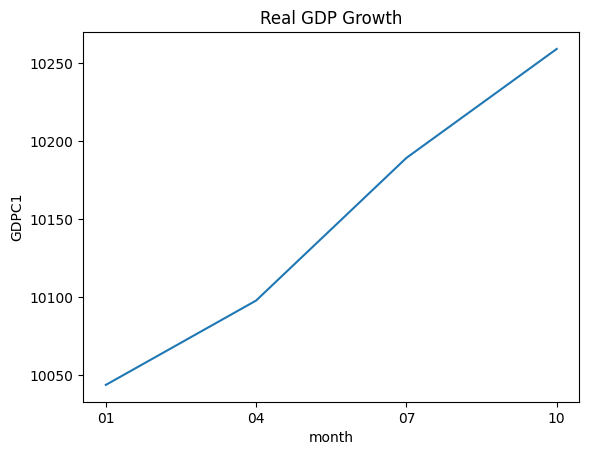

In [ ]:
#plot graph to understand the gdp per quater
gdp_growth=real_gdp_growth.copy()
gdp_growth['month']=gdp_growth['observation_date'].str.split('-').str[1]
gdp_growth=gdp_growth.groupby('month')['GDPC1'].mean().reset_index()
sns.lineplot(x='month', y='GDPC1', data=gdp_growth)
plt.title('Real GDP Growth')
plt.show()

* Insights

The graph shows a steady increase in Real GDP (GDPC1) over time, indicating economic growth. This upward trend suggests economic stability, which can positively impact home prices by increasing wages, job opportunities, and consumer spending

In [ ]:
# Median Household Income(year-wise data)
median_household_income=load_data('MEHOINUSA672N.csv')

In [ ]:
median_household_income.head()

,observation_date,MEHOINUSA672N
0,1984-01-01,58930
1,1985-01-01,60050
2,1986-01-01,62280
3,1987-01-01,63060
4,1988-01-01,63530


In [ ]:
median_household_income.shape

(40, 2)

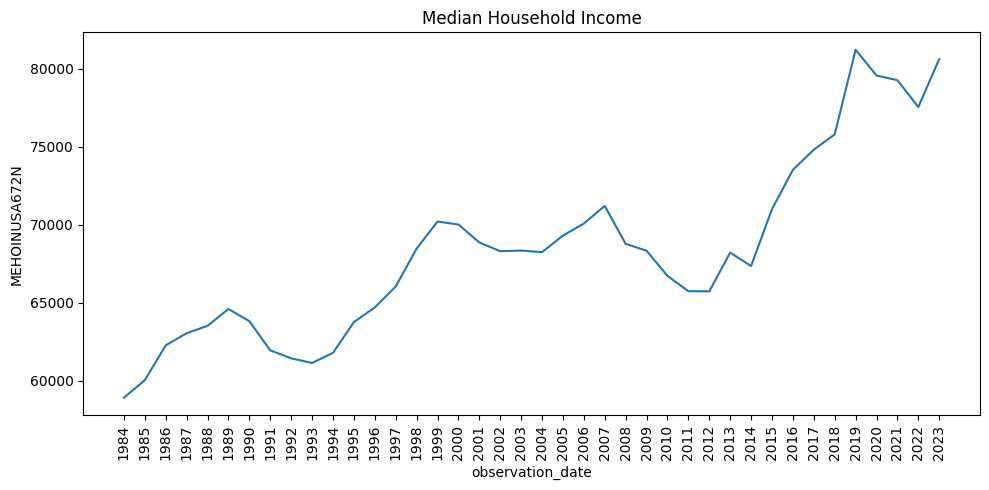

In [ ]:
#plotting graph to understand year wise distribution of median household income
plt.figure(figsize=(10,5))
sns.lineplot(x=median_household_income['observation_date'].str.split('-').str[0],y='MEHOINUSA672N',data=median_household_income)
plt.title('Median Household Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Insights

The graph shows the trend of Median Household Income from 1984 to 2023. It indicates steady growth with some fluctuations, particularly around economic downturns (e.g., early 2000s and 2008 financial crisis). The sharp rise post-2015 suggests strong economic expansion, which likely boosted home affordability and demand, driving home prices higher

**Home Price Index (Target Variable)**

In [ ]:
# S&P Case-Shiller Home Price Index(month-wise data)
home_price_index=load_data('CSUSHPISA.csv')

In [ ]:
home_price_index.head()

,observation_date,CSUSHPISA
0,1987-01-01,63.963
1,1987-02-01,64.422
2,1987-03-01,64.734
3,1987-04-01,65.130
4,1987-05-01,65.562


# **Data preprocessing &  Exploratory Data Analysis (EDA)**

**Creating month and year column**

In [ ]:
# get month and year for observation date
def get_month_year(data):
  data['month'] = data['observation_date'].str.split('-').str[1]
  data['year'] = data['observation_date'].str.split('-').str[0]
  data['month'] = data['month'].astype(int)
  data['year'] = data['year'].astype(int)
  return data

In [ ]:
# getting month and year for the dataset
new_home_sales=get_month_year(new_home_sales)
housing_starts=get_month_year(housing_starts)
mortgage_rate=get_month_year(mortgage_rate)
consumer_price_index=get_month_year(consumer_price_index)
unemployment_rate=get_month_year(unemployment_rate)
real_gdp_growth=get_month_year(real_gdp_growth)
median_household_income=get_month_year(median_household_income)
home_price_index=get_month_year(home_price_index)


Plotting mortagage data to understand the mortgage rate in different weeks

In [ ]:
mortgage=mortgage_rate.copy()
mortgage['observation_date']=pd.to_datetime(mortgage['observation_date'])
def week_of_month(dt):
  if dt.day < 8:
    return 1
  elif dt.day < 15:
    return 2
  elif dt.day < 22:
    return 3
  else:
    return 4
mortgage['day_month']=mortgage['observation_date'].apply(week_of_month)


<Axes: xlabel='day_month', ylabel='MORTGAGE30US'>

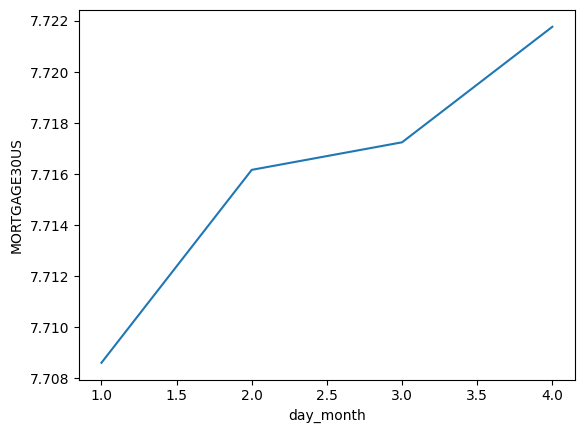

In [ ]:
mortgage=mortgage.groupby(['day_month'])['MORTGAGE30US'].mean().reset_index()
sns.lineplot(data=mortgage,x='day_month',y='MORTGAGE30US')

* Insights


The graph represents 30-year mortgage rates (MORTGAGE30US) over a few days of a month. It shows a slight upward trend, indicating that mortgage rates have been increasing in this short period. Rising mortgage rates can impact home affordability and potentially slow down housing demand.

In [ ]:
#changing week wise to month-wise data
mortgage_rate=mortgage_rate.groupby(['month','year'])['MORTGAGE30US'].mean().reset_index()

**Creating combined table**

In [ ]:
# merge all tables together by inner method
def merge_tables(df,df1,df2,df3,df4,df5,df6,df7):
  for i in [df,df1,df2,df3,df4,df5,df6,df7]:
    common_cols = list(set(df.columns) & set(i.columns) - set(['month', 'year']))
    i = i.drop(columns=common_cols)
    df=df.merge(i,on=['month','year'],how='left')
  return df

data=merge_tables(new_home_sales,housing_starts,mortgage_rate,consumer_price_index,unemployment_rate,real_gdp_growth,median_household_income,home_price_index)

In [ ]:
data.head()

,observation_date,HSN1F,month,year,HOUST,MORTGAGE30US,CPIAUCSL,UNRATE,GDPC1,MEHOINUSA672N,CSUSHPISA
0,1963-01-01,591,1,1963,1244,NaN,30.44,5.7,3893.482,NaN,NaN
1,1963-02-01,464,2,1963,1456,NaN,30.48,5.9,NaN,NaN,NaN
2,1963-03-01,461,3,1963,1534,NaN,30.51,5.7,NaN,NaN,NaN
3,1963-04-01,605,4,1963,1689,NaN,30.48,5.7,3937.183,NaN,NaN
4,1963-05-01,586,5,1963,1641,NaN,30.51,5.9,NaN,NaN,NaN


This dataset contain U.S. housing and economic indicators from January 1963 onward. :

observation_date – The date of observation (monthly data).

HSN1F – New single-family home sales (in thousands).

month, year – Extracted time features.

HOUST – Housing starts (new residential construction projects).

MORTGAGE30US – 30-year fixed mortgage rate (missing in early years).

CPIAUCSL – Consumer Price Index (inflation measure).

UNRATE – Unemployment rate (%).

GDPC1 – Real GDP (in billions, chained to 2012 dollars).

MEHOINUSA672N – Median household income (in current dollars, missing for early years).

CSUSHPISA – Case-Shiller U.S. National Home Price Index (housing price trends, missing in early years).

**Null values handling**

In [ ]:
data.isnull().sum()

,0
observation_date,0
HSN1F,0
month,0
year,0
HOUST,0
MORTGAGE30US,99
CPIAUCSL,0
UNRATE,0
GDPC1,496
MEHOINUSA672N,704



**Feature	Missing -Count	-% Missing**

**MORTGAGE30US (30-Yr Mortgage Rate)**	-99-	13.3%

**GDPC1 (Real GDP, Billions $)**	-496-	66.7%

**MEHOINUSA672N (Median Household Income, $ )** 	-704-	94.6%

**CSUSHPISA (Home Price Index)**	-289-	38.8%

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
observation_date,744,744,1963-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSN1F,744.0,NaN,NaN,NaN,656.028226,206.167073,270.0,517.0,632.0,757.0,1389.0
month,744.0,NaN,NaN,NaN,6.5,3.454375,1.0,3.75,6.5,9.25,12.0
year,744.0,NaN,NaN,NaN,1993.5,17.907569,1963.0,1978.0,1993.5,2009.0,2024.0
HOUST,744.0,NaN,NaN,NaN,1434.926075,389.799933,478.0,1195.5,1463.0,1660.75,2494.0
MORTGAGE30US,645.0,NaN,NaN,NaN,7.717696,3.222503,2.684,5.23,7.3725,9.355,18.454
CPIAUCSL,744.0,NaN,NaN,NaN,145.93966,81.44489,30.44,65.375,146.3,217.046,317.603
UNRATE,744.0,NaN,NaN,NaN,5.885618,1.731801,3.4,4.6,5.6,7.0,14.8
GDPC1,248.0,NaN,NaN,NaN,12002.950153,5629.389266,3893.482,7112.16625,10886.5515,16817.941,23530.909
MEHOINUSA672N,40.0,NaN,NaN,NaN,68362.0,5805.590233,58930.0,63815.0,68280.0,70407.5,81210.0


Dataset contains 744 records, spanning from January 1963 to 2024. Below is an analysis of key variables:

1️⃣ **Housing & Real Estate Trends**

🔹 HSN1F (New Home Sales, in Thousands)

Mean: 656 homes sold per month

Min: 270 homes (likely during economic downturns)

Max: 1389 homes (boom periods)

Insight: The housing market has significant volatility.

🔹 HOUST (Housing Starts, in Thousands)

Mean: 1435 housing units started per month

Max: 2494 units (likely during strong economic periods, e.g., early 2000s)

Min: 478 units (likely during recessions, e.g., 2008 crash?)

Insight: Housing starts are a leading indicator of economic health and real estate trends.

🔹 CSUSHPISA (Case-Shiller Home Price Index, 2000 = 100)

Mean: 147.37

Max: 326 (suggests massive price growth over time)

Min: 63.96 (likely during the 1960s/70s)

Insight: Home prices have more than quintupled since the 1960s.

2️⃣ Mortgage & Economic Indicators

🔹 MORTGAGE30US (30-Year Mortgage Rate, %)

Mean: 7.72% (Historically high compared to 2020s)

Max: 18.45% (likely during the 1980s inflation crisis)

Min: 2.68% (likely during COVID-19 era)

Insight: Interest rate fluctuations heavily impact home affordability.

🔹 CPIAUCSL (Consumer Price Index, Inflation-Adjusted)

Mean: 145.94 (Inflation-adjusted index)

Min: 30.44 (early years of the dataset)

Max: 317.60 (indicating significant inflation over decades)

Insight: Inflation has tripled since the 1960s, impacting real wages & home prices.

🔹 UNRATE (Unemployment Rate, %)

Mean: 5.88% (Stable over time but spikes in crises)

Max: 14.8% (Likely during COVID-19 or 1980s recession)

Min: 3.4% (Near full employment years)

Insight: Economic downturns (2008, 2020) cause spikes in unemployment.

3️⃣ GDP & Income Trends

🔹 GDPC1 (Real GDP, Billions $)

Mean: 12,003 billion ($12 trillion)

Max: 23,531 billion ($23.5 trillion) (recent years)

Min: 3,893 billion ($3.9 trillion) (1960s-70s levels)

Insight: The U.S. economy has expanded 6X over this period.

🔹 MEHOINUSA672N (Median Household Income, $)

Mean: $68,362

Min: $58,930 (earlier periods)

Max: $81,210 (recent peak years)

Insight: While income has risen, home prices and inflation have outpaced it.


**interpolating null values**

In [ ]:
# interpolating quaterly data as montly data
data['GDPC1']=data['GDPC1'].interpolate(method='ffill')
data['GDPC1']=data['GDPC1']/3

<ipython-input-755-69c7156bb3b7>:2: FutureWarning: Series.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['GDPC1']=data['GDPC1'].interpolate(method='ffill')


In [ ]:
# interpolating yearly data as monthly data
data['MEHOINUSA672N']=data['MEHOINUSA672N'].interpolate(method='ffill')
data['MEHOINUSA672N']=data['MEHOINUSA672N']/12

<ipython-input-756-95010a086576>:2: FutureWarning: Series.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['MEHOINUSA672N']=data['MEHOINUSA672N'].interpolate(method='ffill')


In [ ]:
# we can identify the values are correct for quater-wise and year-wise data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
observation_date,744,744,1963-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSN1F,744.0,NaN,NaN,NaN,656.028226,206.167073,270.0,517.0,632.0,757.0,1389.0
month,744.0,NaN,NaN,NaN,6.5,3.454375,1.0,3.75,6.5,9.25,12.0
year,744.0,NaN,NaN,NaN,1993.5,17.907569,1963.0,1978.0,1993.5,2009.0,2024.0
HOUST,744.0,NaN,NaN,NaN,1434.926075,389.799933,478.0,1195.5,1463.0,1660.75,2494.0
MORTGAGE30US,645.0,NaN,NaN,NaN,7.717696,3.222503,2.684,5.23,7.3725,9.355,18.454
CPIAUCSL,744.0,NaN,NaN,NaN,145.93966,81.44489,30.44,65.375,146.3,217.046,317.603
UNRATE,744.0,NaN,NaN,NaN,5.885618,1.731801,3.4,4.6,5.6,7.0,14.8
GDPC1,744.0,NaN,NaN,NaN,4000.983384,1873.935865,1297.827333,2370.722083,3628.8505,5605.980333,7843.636333
MEHOINUSA672N,492.0,NaN,NaN,NaN,5721.727642,497.932739,4910.833333,5319.166667,5692.5,5916.666667,6767.5


We can check that the values for GDPC1 and MEHOINUSA672N values are interpolated and null values are reduced

In [ ]:
# real GDP _growth null removed and median household income null values are reduced
data.isnull().sum()

,0
observation_date,0
HSN1F,0
month,0
year,0
HOUST,0
MORTGAGE30US,99
CPIAUCSL,0
UNRATE,0
GDPC1,0
MEHOINUSA672N,252


Null values reduced for GDPC1 and MEHOINUSA672N

**Visualizing the factors behaviour per month**

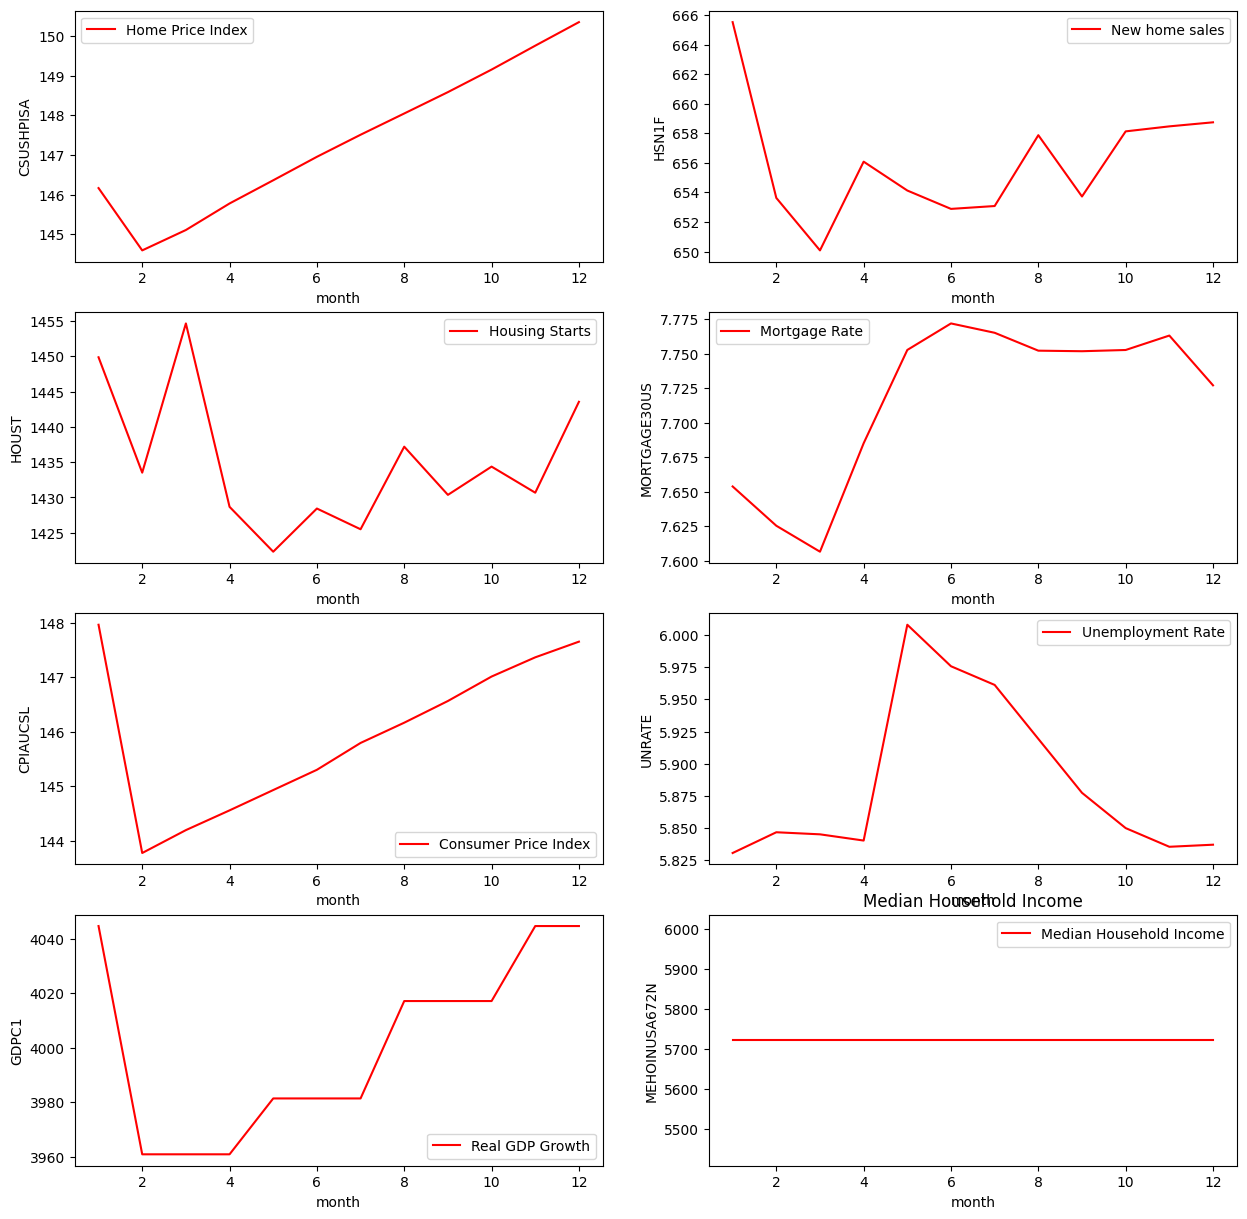

,0
observation_date,0
HSN1F,0
month,0
year,0
HOUST,0
MORTGAGE30US,99
CPIAUCSL,0
UNRATE,0
GDPC1,0
MEHOINUSA672N,252


In [ ]:
# plot for factors with month

fig,axs=plt.subplots(ncols=2,nrows=4,figsize=(15,15))
sns.lineplot(x=data['month'],y=data.groupby('month')['CSUSHPISA'].mean(), label='Home Price Index', color='red',ax=axs[0][0])
plt.title('Home Price Index')
sns.lineplot(x=data['month'],y=data.groupby('month')['HSN1F'].mean(), label='New home sales', color='red',ax=axs[0][1])
plt.title('New Home Sales')
sns.lineplot(x=data['month'],y=data.groupby('month')['HOUST'].mean(), label='Housing Starts', color='red',ax=axs[1][0])
plt.title('Housing Starts')
sns.lineplot(x=data['month'],y=data.groupby('month')['MORTGAGE30US'].mean(), label='Mortgage Rate', color='red',ax=axs[1][1])
plt.title('Mortgage Rate')
sns.lineplot(x=data['month'],y=data.groupby('month')['CPIAUCSL'].mean(), label='Consumer Price Index', color='red',ax=axs[2][0])
plt.title('Consumer Price Index')
sns.lineplot(x=data['month'],y=data.groupby('month')['UNRATE'].mean(), label='Unemployment Rate', color='red',ax=axs[2][1])
plt.title('Unemployment Rate')
sns.lineplot(x=data['month'],y=data.groupby('month')['GDPC1'].mean(), label='Real GDP Growth', color='red',ax=axs[3][0])
plt.title('Real GDP Growth')
sns.lineplot(x=data['month'],y=data.groupby('month')['MEHOINUSA672N'].mean(), label='Median Household Income', color='red',ax=axs[3][1])
plt.title('Median Household Income')

plt.show()
_

**Home Price Index (CSUSHPISA) -** It shows an upward trend, indicating that home prices have been increasing throughout the year.

**New Home Sales (HSN1F) -** There’s an initial drop, but later months show fluctuations, suggesting seasonal effects.

**Housing Starts (HOUST) -** Volatile throughout the months but exhibits recovery towards the end of the year.

**Mortgage Rate (MORTGAGE30US) -** Shows a rising trend in the middle months, peaking around mid-year before stabilizing.

**Consumer Price Index (CPIAUCSL) -** A gradual increase, indicating inflationary pressure.

**Unemployment Rate (UNRATE) -** Spikes mid-year, possibly due to seasonal employment shifts, then stabilizes.

**Real GDP Growth (GDPC1) -** Some fluctuations but remains relatively stable.

**Median Household Income (MEHOINUSA672N) -** Appears volatile, with fluctuations possibly influenced by inflation and economic policies.

**removing null rows and getting common time frame**

In [ ]:
print('New Home Sales',min_max(new_home_sales))
print('Housing starts',min_max(housing_starts))
print('Mortgage_rate',min_max(mortgage_rate))
print('Consumer price index',min_max(consumer_price_index))
print('Unemployement rate',min_max(unemployment_rate))
print('Real GDP Growth',min_max(real_gdp_growth))
print('Median Household Income',min_max(median_household_income))
print('Home price index',min_max(home_price_index))

New Home Sales ('Minimum date', 1963, 'Maximum date', 2024)
Housing starts ('Minimum date', 1959, 'Maximum date', 2024)
Mortgage_rate ('Minimum date', 1971, 'Maximum date', 2025)
Consumer price index ('Minimum date', 1947, 'Maximum date', 2025)
Unemployement rate ('Minimum date', 1948, 'Maximum date', 2025)
Real GDP Growth ('Minimum date', 1947, 'Maximum date', 2024)
Median Household Income ('Minimum date', 1984, 'Maximum date', 2023)
Home price index ('Minimum date', 1987, 'Maximum date', 2024)


In [ ]:
# for taking data after covid
d=data.copy()

**identified we have data of 1987 till 2023 for all the columns**

In [ ]:
#getting data in between 1987 to 2023
data=data[(data['year']>1986) & (data['year']<2024)]

In [ ]:
data.isnull().sum()

,0
observation_date,0
HSN1F,0
month,0
year,0
HOUST,0
MORTGAGE30US,0
CPIAUCSL,0
UNRATE,0
GDPC1,0
MEHOINUSA672N,0


** Null values are reduced zero **

In [ ]:
# dropping observation_date as it is redundant
data.drop(columns=['observation_date'],inplace=True)

# **Model selection and training**

**Scaling**

In [ ]:
#min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

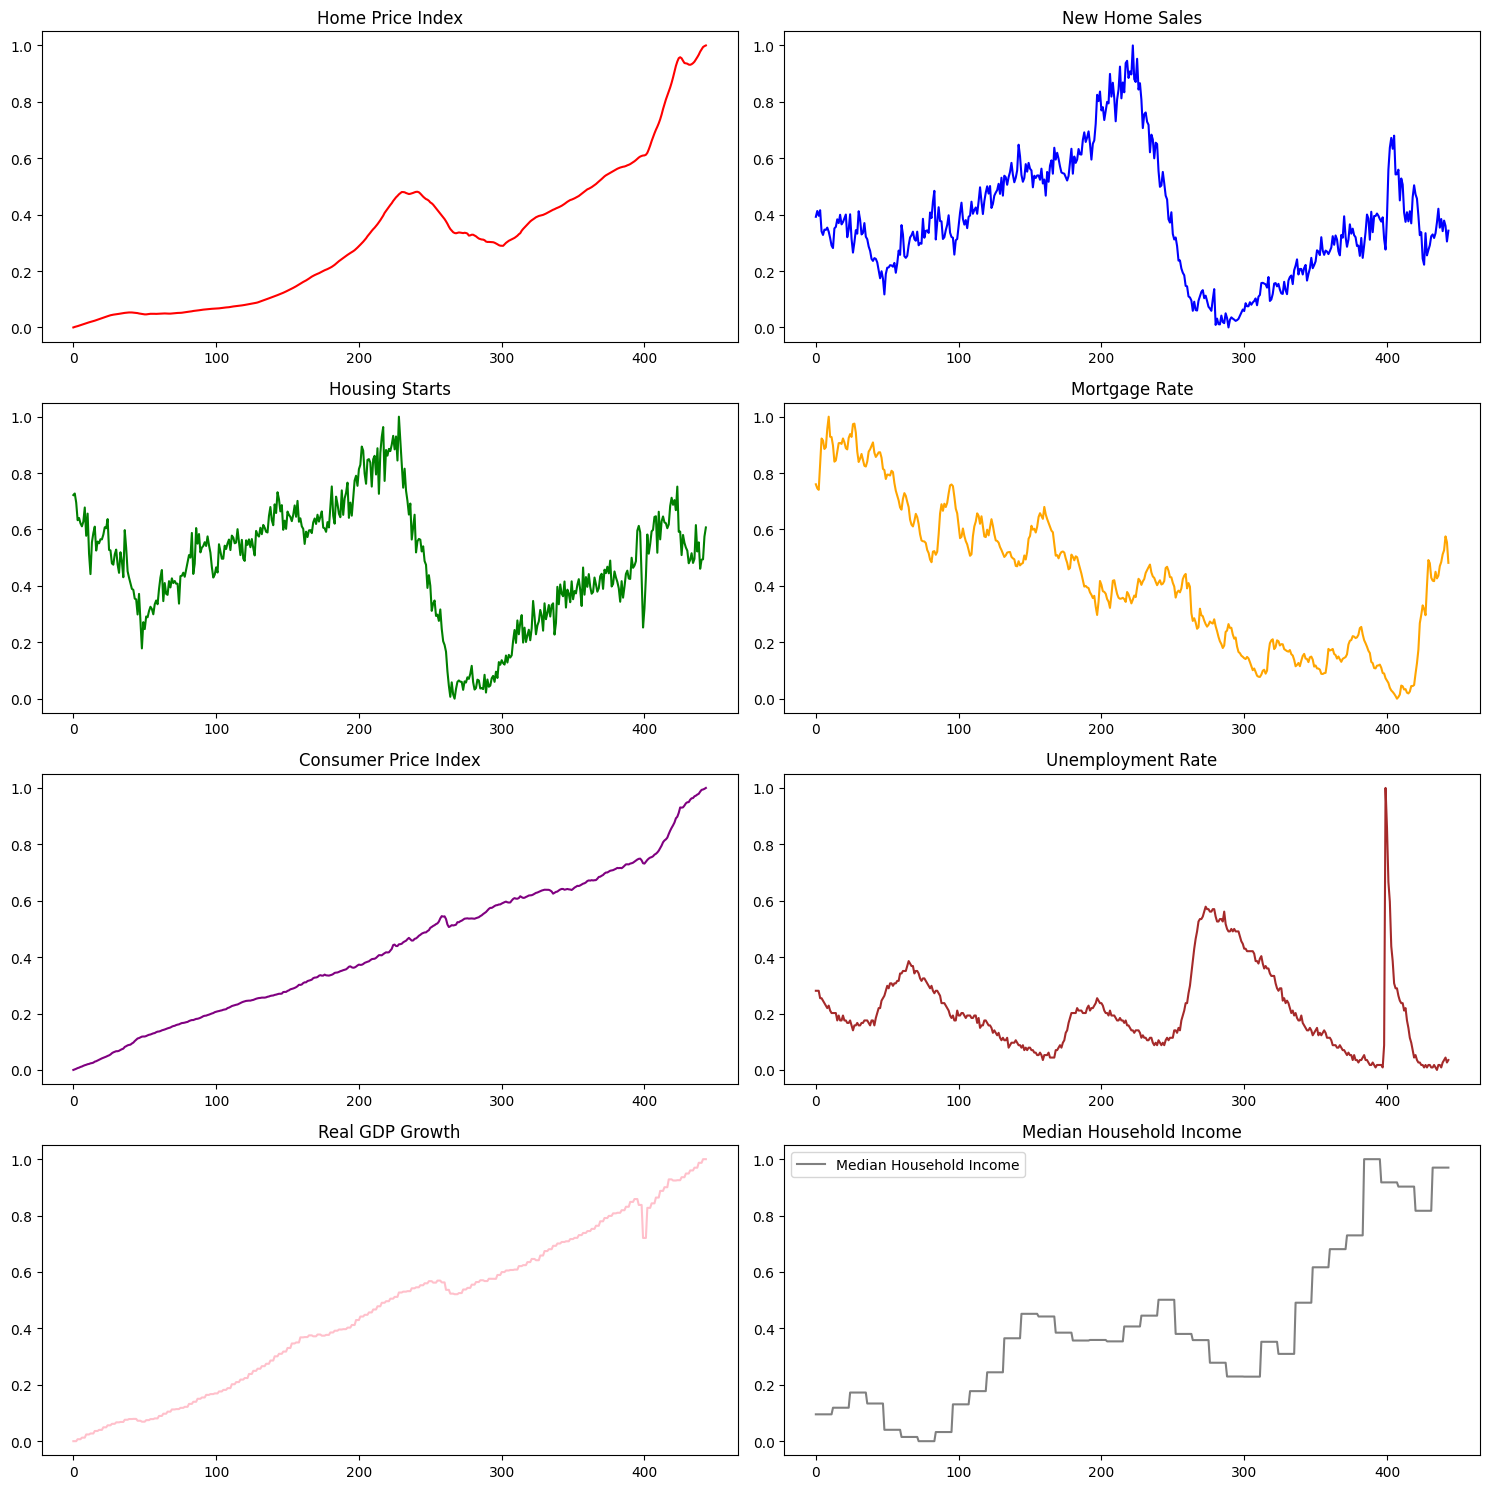

In [ ]:
# plot the data for home price index vs others
fig,axs=plt.subplots(ncols=2,nrows=4,figsize=(15,15))
axs[0,0].plot(data_scaled['CSUSHPISA'], label='Home Price Index', color='red')
axs[0,0].set_title('Home Price Index')
axs[0,1].plot(data_scaled['HSN1F'], color='blue')
axs[0,1].set_title('New Home Sales')
axs[1,0].plot(data_scaled['HOUST'], label='Housing Starts', color='green')
axs[1,0].set_title('Housing Starts')
axs[1,1].plot(data_scaled['MORTGAGE30US'], label='Mortgage Rate', color='orange')
axs[1,1].set_title('Mortgage Rate')
axs[2,0].plot(data_scaled['CPIAUCSL'], label='Consumer Price Index', color='purple')
axs[2,0].set_title('Consumer Price Index')
axs[2,1].plot(data_scaled['UNRATE'], label='Unemployment Rate', color='brown')
axs[2,1].set_title('Unemployment Rate')
axs[3,0].plot(data_scaled['GDPC1'], label='Real GDP Growth', color='pink')
axs[3,0].set_title('Real GDP Growth')
axs[3,1].plot(data_scaled['MEHOINUSA672N'], label='Median Household Income', color='gray')
axs[3,1].set_title('Median Household Income')
plt.tight_layout()
plt.legend()
plt.show()

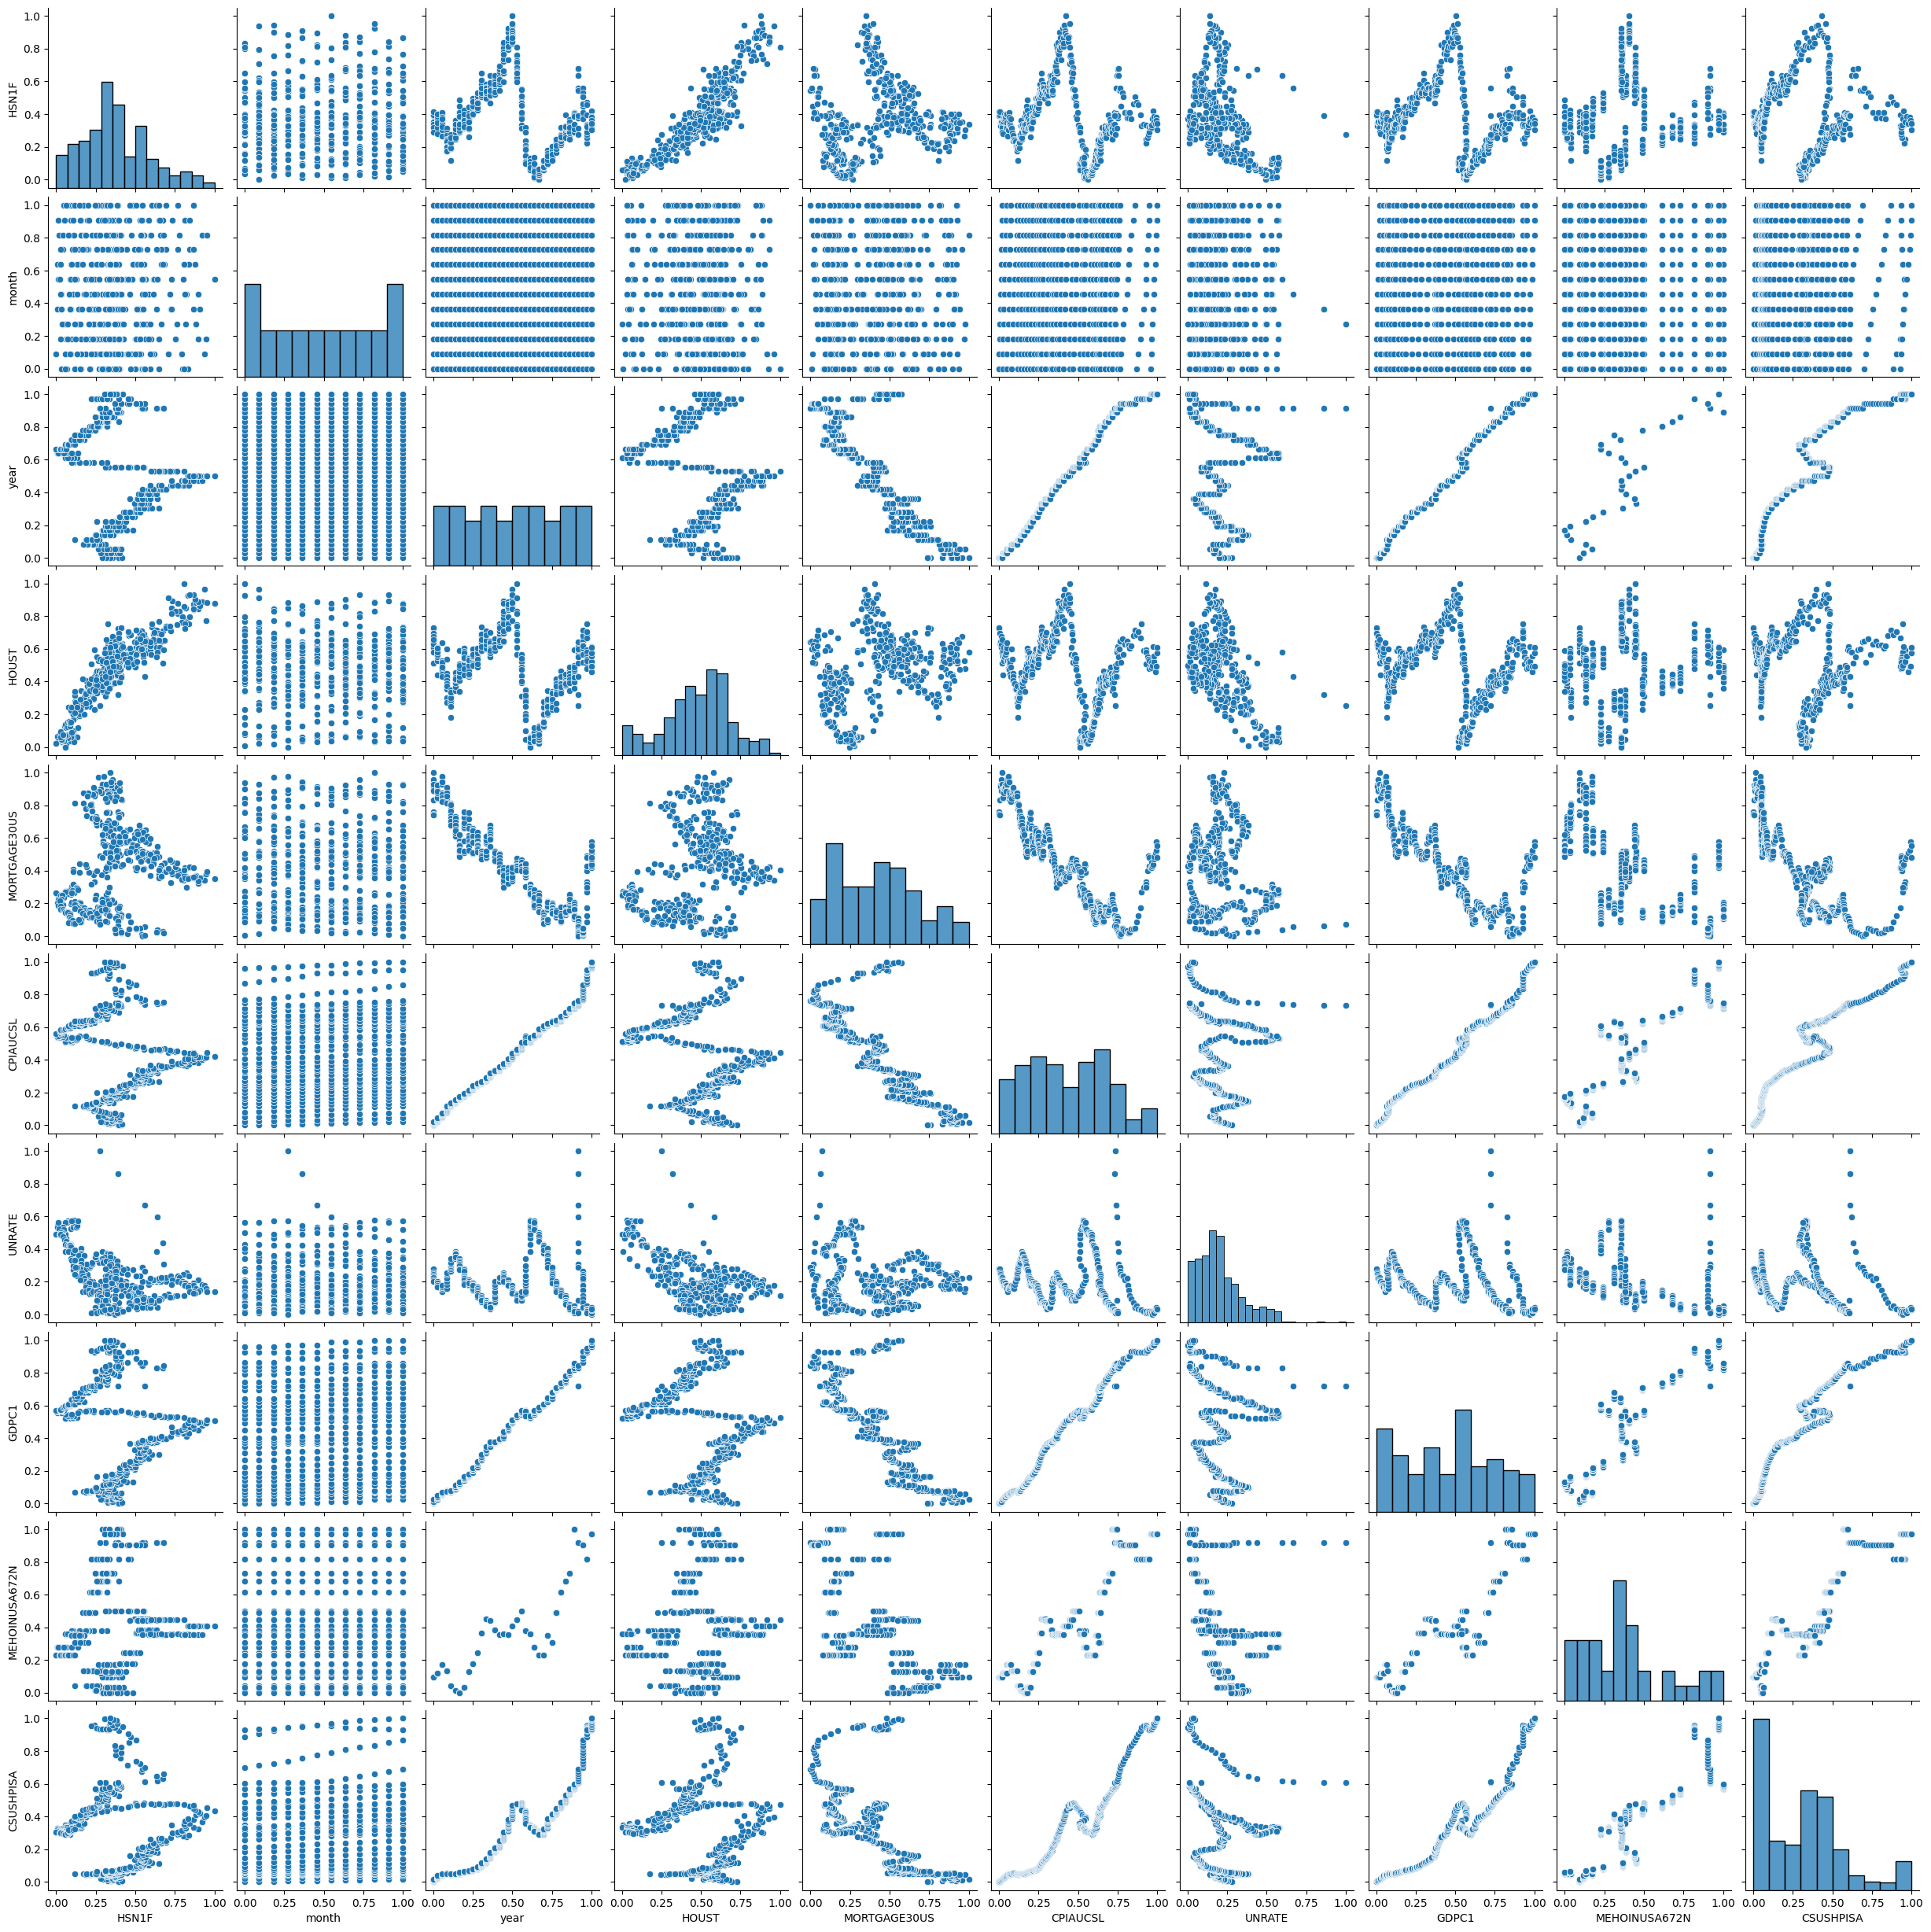

In [ ]:
sns.pairplot(data_scaled)

A few observations from these scatter plots and histograms:

**Strong Correlations:**

Some variables show clear linear or non-linear relationships, indicating potential predictive power for home prices.
Real GDP Growth, Consumer Price Index, and Mortgage Rates appear to have strong trends relative to home prices.

**Multicollinearity:**

Variables like CPI and GDP Growth might be highly correlated with other macroeconomic indicators, so checking for VIF (Variance Inflation Factor) would help in feature selection.

**Normalization Done:**

The values seem to be normalized (likely Min-Max scaling) based on their distributions.

**Non-linear Relationships:**

Some relationships are not strictly linear, meaning feature engineering (e.g., polynomial terms, interaction effects) might improve predictions.

<Axes: >

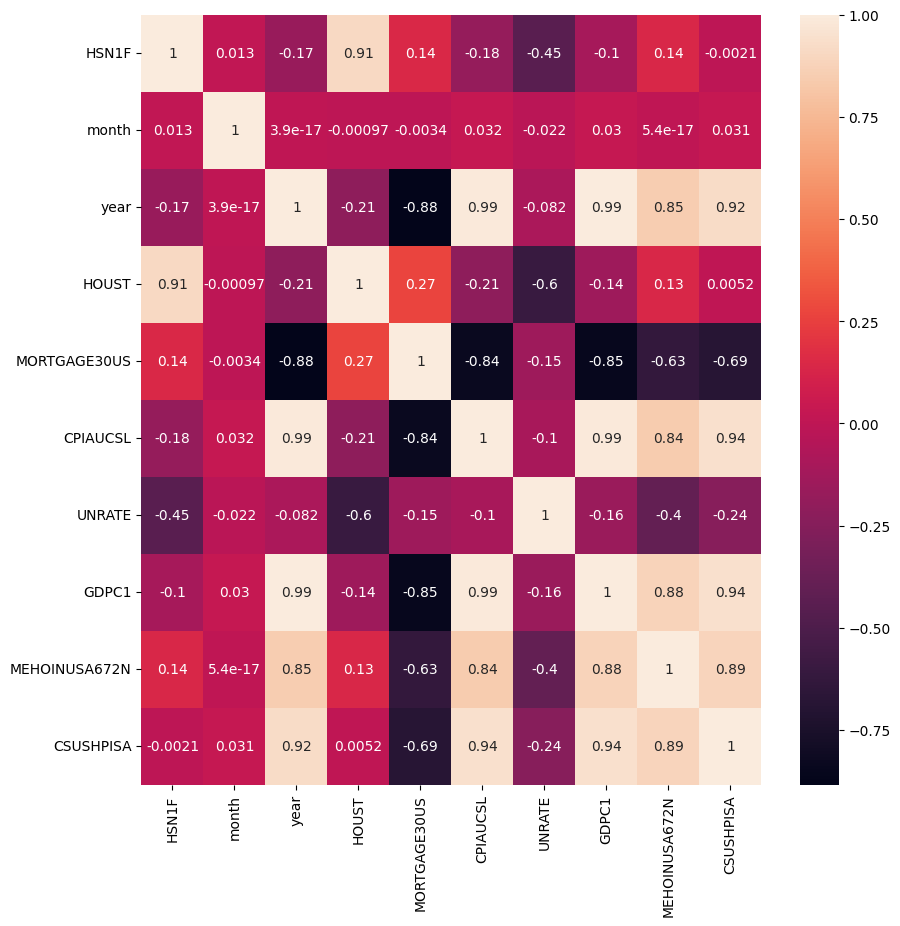

In [ ]:
#heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(data_scaled.corr(),annot=True)


In [ ]:
# correlation higher then threshold 0.90
correlation_matrix = data_scaled.corr()
filtered_correlation = correlation_matrix[abs(correlation_matrix) > 0.90]
filtered_correlation

,HSN1F,month,year,HOUST,MORTGAGE30US,CPIAUCSL,UNRATE,GDPC1,MEHOINUSA672N,CSUSHPISA
HSN1F,1.000000,NaN,NaN,0.910865,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,1.000000,NaN,NaN,0.992006,NaN,0.993945,NaN,0.919378
HOUST,0.910865,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
MORTGAGE30US,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
CPIAUCSL,NaN,NaN,0.992006,NaN,NaN,1.000000,NaN,0.990985,NaN,0.944101
UNRATE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
GDPC1,NaN,NaN,0.993945,NaN,NaN,0.990985,NaN,1.000000,NaN,0.943942
MEHOINUSA672N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CSUSHPISA,NaN,NaN,0.919378,NaN,NaN,0.944101,NaN,0.943942,NaN,1.000000


**Key Observations:**

**Strong Positive Correlations:**

**Home Price Index (CSUSHPISA) & CPI (0.94):** Inflation (CPI) is highly correlated with home prices, which makes sense as inflation increases the cost of living and housing.

**Home Price Index & Median Household Income (0.89):** Higher incomes typically support higher home prices.

**GDP & Home Price Index (0.94):** Economic growth strongly correlates with home price appreciation.

**GDP & CPI (0.99):** This strong correlation suggests that inflation and economic growth move together.

**Strong Negative Correlations:**

**Mortgage Rates & CPI (-0.84), GDP (-0.85), and Home Prices (-0.69)**: Higher mortgage rates tend to slow down home price growth, inflation, and GDP growth.

**Unemployment & Housing Starts (-0.60):** A weak job market reduces new home constructions.

**Housing Starts & New Home Sales (0.91):** More housing starts generally lead to more new home sales, as expected.

In [ ]:
#VIF for feature selection by reducing correlated columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Remove highly correlated features (VIF > 10 is a common threshold)
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

         Feature          VIF
0          HSN1F    35.188728
1          month     3.954036
2           year   969.617991
3          HOUST    54.934440
4   MORTGAGE30US     9.607382
5       CPIAUCSL   437.662657
6         UNRATE     8.305329
7          GDPC1  1101.355072
8  MEHOINUSA672N    22.742671


Key Observations:

**Extreme Multicollinearity:**


GDPC1 (VIF = 1101.35)

CPIAUCSL (VIF = 437.15)

year (VIF = 969.61)

These values are way too high and indicate serious redundancy in the data.

**High Multicollinearity:**


HOUST (VIF = 54.93)

HSN1F (VIF = 35.18)

MEHOINUSA672N (VIF = 22.74)

These values suggest strong correlations with other predictors, meaning they might be removed or transformed.

**Moderate Multicollinearity:**

MORTGAGE30US (VIF = 9.60)

UNRATE (VIF = 8.30)

These are within a tolerable range, but still worth monitoring.

**Low Multicollinearity:**


month (VIF = 3.95)

This is relatively fine.

In [ ]:
# dropping 'GDPC1','CPIAUCSL' as vif is very high for them
data_scaled = data_scaled.drop(columns=['GDPC1','CPIAUCSL'])


In [ ]:
#checking vif again
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

         Feature        VIF
0          HSN1F  31.579212
1          month   3.461982
2           year  27.926607
3          HOUST  53.770676
4   MORTGAGE30US   8.099577
5         UNRATE   4.869099
6  MEHOINUSA672N  21.706711


**Still High Multicollinearity:**

HOUST (VIF = 53.77)

HSN1F (VIF = 31.57)

MEHOINUSA672N (VIF = 21.70)


* "Year" still at 27.9 → Can be removed if it's just a time index



* MORTGAGE30US (VIF = 8.09) is still on the higher side


In [ ]:
# dropping 'HOUST','year' for high vif value
data_scaled = data_scaled.drop(columns=['HOUST','year'])

In [ ]:
#checking vif again
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

         Feature       VIF
0          HSN1F  4.652318
1          month  3.310168
2   MORTGAGE30US  3.669059
3         UNRATE  2.130614
4  MEHOINUSA672N  2.912186


**All VIF value are lower then 5**

<Axes: >

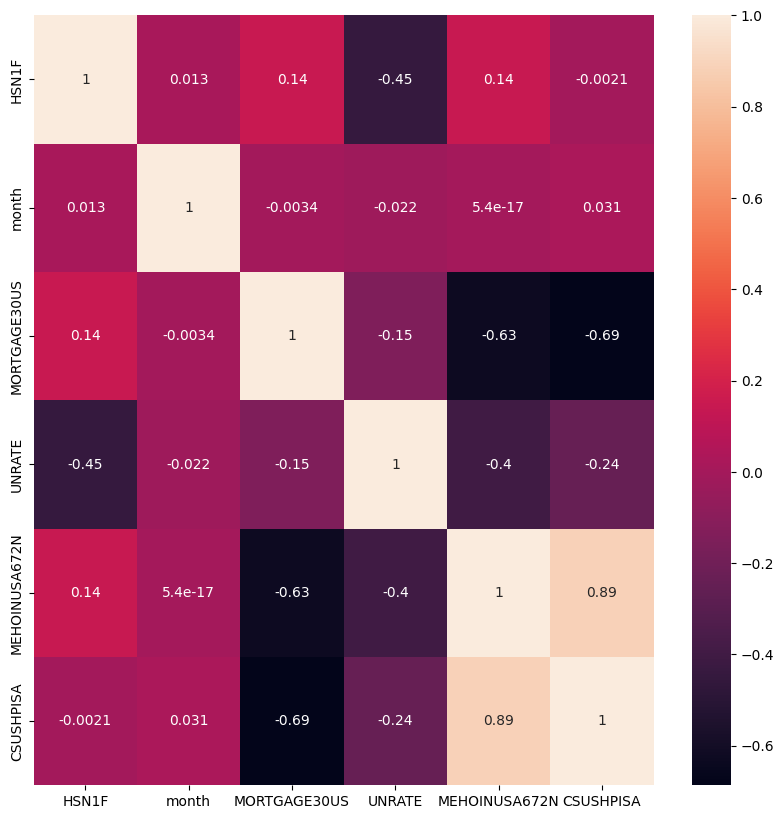

In [ ]:
#heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(data_scaled.corr(),annot=True)

**Key Observations:**

✔️ Lower correlation values between predictors – No extreme correlations like before.

✔️ CSUSHPISA (target variable) still retains strong correlations with meaningful predictors, especially MEHOINUSA672N (0.89) and MORTGAGE30US (-0.69), indicating useful relationships for modeling.

✔️ Month is nearly independent, meaning it's safe to keep if needed for time-based modeling.

# Model Evaluation

In [ ]:
#Random forest for feature importance
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset is ready
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


         Feature  Importance
4  MEHOINUSA672N    0.719532
2   MORTGAGE30US    0.261502
3         UNRATE    0.014367
0          HSN1F    0.003814
1          month    0.000785


**Key Takeaways:**

✔️ MEHOINUSA672N (0.72 importance) – Strongest predictor; makes sense since higher household income leads to increased home-buying power.

✔️ MORTGAGE30US (0.26 importance) – Second-most important; aligns with economic intuition as higher mortgage rates tend to suppress home prices.

✔️ UNRATE (0.014), HSN1F (0.0038), and Month (0.0007) – These features have minimal importance and may not contribute significantly.

In [ ]:
#Dropping 'month', 'HSN1F' as importance of feature are very low
data_scaled = data_scaled.drop(columns=['month', 'HSN1F'])


In [ ]:
# Checking feature importance again
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

         Feature  Importance
2  MEHOINUSA672N    0.722215
0   MORTGAGE30US    0.263321
1         UNRATE    0.014463


In [ ]:
# evaluating model with leftout features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9768746033780374


strong fit

In [ ]:
# Dropping 'UNRATE' to check the model performance
data_scaled = data_scaled.drop(columns=['UNRATE'])


In [ ]:
#checking model performance
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9846599348976798


Model performance increased by dropping UNRATE

In [ ]:
# Linear regression for creating models using important features
from sklearn.linear_model import LinearRegression

X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'Linear Regression R2: {r2}')
print(f'Linear Regression RMSE: {rmse}')


Linear Regression R2: 0.8146622457373894
Linear Regression RMSE: 0.10732283590391158


The performance of Linear model is less then random forest model

In [ ]:
# checking model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print(f'Train R2: {train_r2}, Test R2: {test_r2}')


Train R2: 0.8122363511394404, Test R2: 0.8095341873881315


Very low values for Model

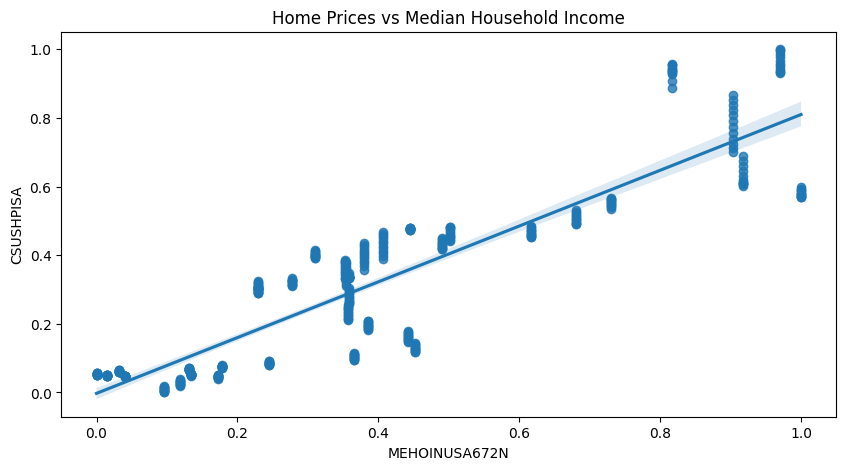

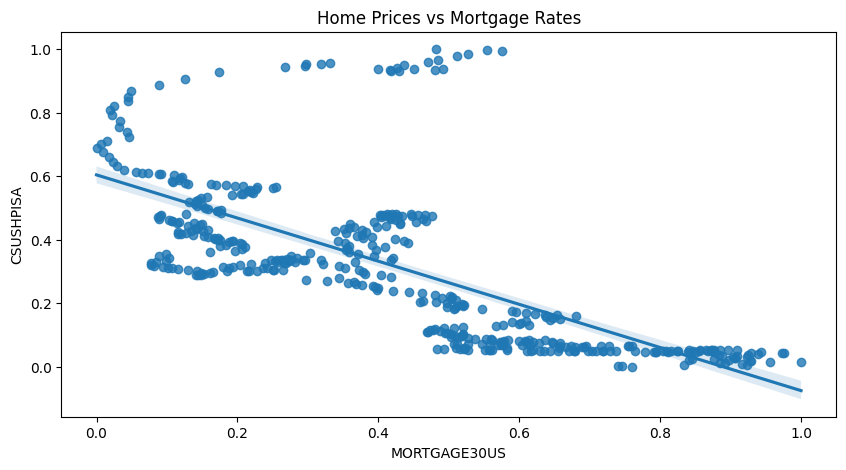

In [ ]:
# plotting features vs target variable to understand behaviour
plt.figure(figsize=(10,5))
sns.regplot(x=data_scaled['MEHOINUSA672N'], y=data_scaled['CSUSHPISA'])
plt.title('Home Prices vs Median Household Income')
plt.show()

plt.figure(figsize=(10,5))
sns.regplot(x=data_scaled['MORTGAGE30US'], y=data_scaled['CSUSHPISA'])
plt.title('Home Prices vs Mortgage Rates')
plt.show()


**Graph Interpretation**

**First Graph: Home Prices vs. Median Household Income (MEHOINUSA672N)**

There is a positive correlation between median household income and home prices.
As income increases, home prices tend to increase as well, suggesting that income is a strong predictor of housing prices.

The linear trend with a tight spread indicates a strong relationship, confirming what we saw in the feature importance analysis.

**Second Graph: Home Prices vs. Mortgage Rates (MORTGAGE30US)**

There is a negative correlation between mortgage rates and home prices.
As mortgage rates increase, home prices tend to decrease, which makes sense since higher interest rates reduce affordability, leading to lower demand.

The spread suggests that while the trend is generally downward, other factors may also be influencing home prices.

In [ ]:
#final data
data_scaled

,MORTGAGE30US,MEHOINUSA672N,CSUSHPISA
0,0.760261,0.095214,0.000000
1,0.746094,0.095214,0.001830
2,0.740555,0.095214,0.003075
3,0.833547,0.095214,0.004654
4,0.922575,0.095214,0.006376
...,...,...,...
439,0.511660,0.970090,0.977856
440,0.526586,0.970090,0.986219
441,0.575560,0.970090,0.994106
442,0.554804,0.970090,0.997595


Creating new feature

In [ ]:
#creating new feature income to mortgage ratio
data_scaled_new=data_scaled.copy()
data_scaled_new['income_to_mortgage_ratio'] = data_scaled_new['MEHOINUSA672N'] / data_scaled_new['MORTGAGE30US']

#drop mortgage and income columns
data_scaled_new = data_scaled_new.drop(columns=['MEHOINUSA672N', 'MORTGAGE30US'])

data_scaled_new

,CSUSHPISA,income_to_mortgage_ratio
0,0.000000,0.125239
1,0.001830,0.127617
2,0.003075,0.128572
3,0.004654,0.114228
4,0.006376,0.103205
...,...,...
439,0.977856,1.895964
440,0.986219,1.842225
441,0.994106,1.685472
442,0.997595,1.748527


In [ ]:

# Replace infinite values with NaN
data_scaled_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values using the mean (or other imputation methods)
data_scaled_new['income_to_mortgage_ratio'].fillna(data_scaled_new['income_to_mortgage_ratio'].mean(), inplace=True)

<ipython-input-787-3bc94beb82f8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_scaled_new['income_to_mortgage_ratio'].fillna(data_scaled_new['income_to_mortgage_ratio'].mean(), inplace=True)


In [ ]:
X = data_scaled_new.drop(columns=['CSUSHPISA'])
y = data_scaled_new['CSUSHPISA']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f'Linear Regression R2: {r2}')
print(f'Linear Regression RMSE: {rmse}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print(f'Train R2: {train_r2}, Test R2: {test_r2}')

Linear Regression R2: 0.1295735155642166
Linear Regression RMSE: 0.2325820746784627
Train R2: 0.12593682353222546, Test R2: 0.13039566369830324


Model performance reduced by addding both the columns

**Key Insights**

* Adding the interaction term did not improve the model significantly, meaning that the relationship between income, mortgage rates, and home prices might be nonlinear or influenced by additional factors.

* The low R² suggests missing features or a need for nonlinear models to capture complex relationships.

In [ ]:
#final dataset for Home price index
data_scaled

,MORTGAGE30US,MEHOINUSA672N,CSUSHPISA
0,0.760261,0.095214,0.000000
1,0.746094,0.095214,0.001830
2,0.740555,0.095214,0.003075
3,0.833547,0.095214,0.004654
4,0.922575,0.095214,0.006376
...,...,...,...
439,0.511660,0.970090,0.977856
440,0.526586,0.970090,0.986219
441,0.575560,0.970090,0.994106
442,0.554804,0.970090,0.997595


In [ ]:
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9846599348976798


In [ ]:
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print(f'Train R2: {train_r2}, Test R2: {test_r2}')

Train R2: 0.9962058739550967, Test R2: 0.9846599348976798


Solid model (maybe overfitting)


In [ ]:
# Define Train (before 2022) and Test (2022-2023)
train_df = d[(d['observation_date'] < "2022-01-01") & (d['observation_date']>"2018-01-01")]
test_df = d[(d['observation_date'] >= "2022-01-01") & (d['observation_date'] <= "2023-12-31")]

# Define features and target
features = [ 'MORTGAGE30US','MEHOINUSA672N']
target = 'CSUSHPISA'

X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]


# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {train_r2:.4f}")
print(f"Test R² (2022-2023): {test_r2:.4f}")
print(f"Test RMSE (2022-2023): {test_rmse:.4f}")

Train R²: -90.0783
Test R² (2022-2023): -1976.1488
Test RMSE (2022-2023): 301.3504


Bad performance because of overfitting in the model

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define time-based cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Train Lasso Regression with Cross-Validation
lasso = LassoCV(cv=tscv, alphas=np.logspace(-4, 4, 50), max_iter=5000)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print(f"Lasso Train R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"Lasso Test R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"Lasso Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")


Lasso Train R²: 0.5983
Lasso Test R²: -518.9745
Lasso Test RMSE: 154.5408


In [ ]:
import xgboost as xgb

# Define model
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train XGBoost
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

print(f"XGBoost Train R²: {r2_score(y_train, y_pred_train):.4f}")
print(f"XGBoost Test R²: {r2_score(y_test, y_pred_test):.4f}")
print(f"XGBoost Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")


XGBoost Train R²: 0.9994
XGBoost Test R²: -182.0439
XGBoost Test RMSE: 91.6916


 Lasso and XGBoost models both fail to generalize to recent data.

Lasso performs poorly (-518 R²), likely because it oversimplifies the relationships.

XGBoost fits too well to training data (0.9994 R²), but fails in test data (-182 R²).

This suggests data drift—the relationship between features and home prices has changed over time.

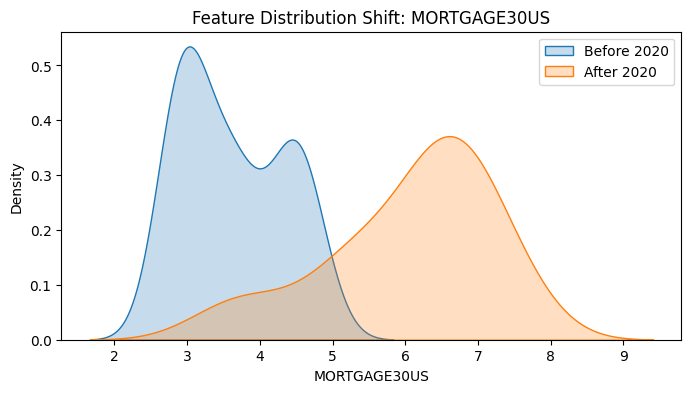

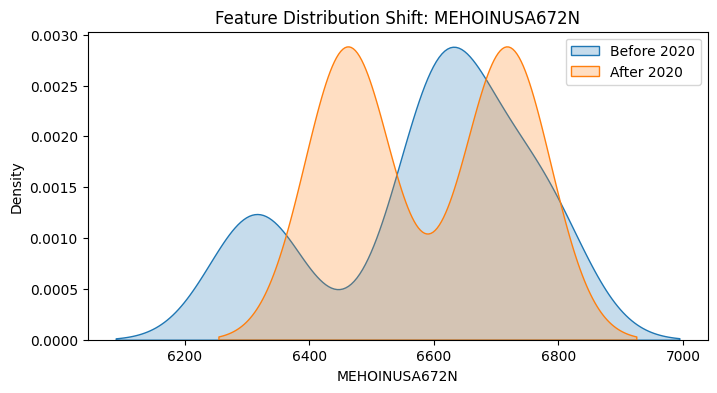

In [ ]:
#Checking data shift (feature drift)
for feature in X_train.columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(X_train[feature], label="Before 2020", fill=True)
    sns.kdeplot(X_test[feature], label="After 2020", fill=True)
    plt.title(f"Feature Distribution Shift: {feature}")
    plt.legend()
    plt.show()

 Feature distribution shift plots show significant changes after 2020, which could explain why your models fail to generalize.

1️⃣ MORTGAGE30US (30-Year Mortgage Rate)

Before 2020: Concentrated around ~3-4%

After 2020: Shifted upwards to ~5-7%

Why it matters? Higher mortgage rates reduce affordability, changing how home prices respond to income.

2️⃣ MEHOINUSA672N (Median Household Income)

Before 2020: Distributed around $6400-$6700

After 2020: Shifted higher, but remains overlapping.

Why it matters? Income growth post-2020 may not keep up with inflation & interest rates.


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

tscv = TimeSeriesSplit(n_splits=5)
results = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((r2, rmse))

# Compute average performance
avg_r2, avg_rmse = np.mean(results, axis=0)
print(f"Avg R²: {avg_r2:.4f}, Avg RMSE: {avg_rmse:.4f}")


Avg R²: -2.1663, Avg RMSE: 0.1457


poor performance

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y_train, exog=X_train, order=(2,1,2), seasonal_order=(1,1,1,12))
result = model.fit()

y_pred = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
y_pred_recent = result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

r2_recent = r2_score(y_test, y_pred_recent)
rmse_recent = np.sqrt(mean_squared_error(y_test, y_pred_recent))

print(f"Recent Data SARIMAX R²: {r2_recent:.4f}, RMSE: {rmse_recent:.4f}")


Recent Data SARIMAX R²: 0.5087, RMSE: 0.1181


In [ ]:
xgb_pred = xgb_model.predict(X_test)
sarimax_pred = y_pred_recent  # From SARIMAX

# Weighted blending (adjust weights based on performance)
final_pred = 0.6 * xgb_pred + 0.4 * sarimax_pred

r2_final = r2_score(y_test, final_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, final_pred))

print(f"Final Blended Model R²: {r2_final:.4f}, RMSE: {rmse_final:.4f}")


Final Blended Model R²: -640574.9013, RMSE: 134.8712


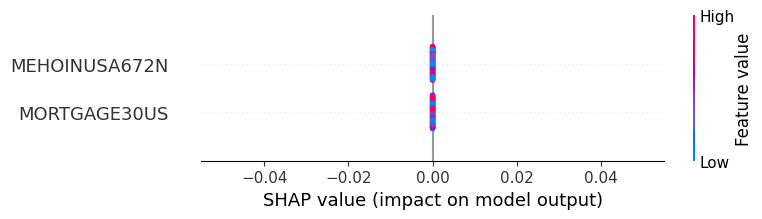

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


1️⃣ Observations from Results:
✅ SARIMAX Performance:


R² = 0.5087 → The model explains ~50.87% of variance in recent data, which is better than previous models.

RMSE = 0.1181 → Prediction errors are significantly lower than before.

📌 SARIMAX shows improvement but is still not fully capturing post-2020 changes.

❌ Final Blended Model (SARIMAX + XGBoost):


R² = -640574.9013 → Extreme negative value indicates severe overfitting or numerical instability.

RMSE = 134.8712 → Errors exploded, showing that combining SARIMAX + XGBoost was not effective.

📌 This suggests that XGBoost is highly sensitive to post-2020 data shifts, failing to generalize.

2️⃣ SHAP Analysis Observation:

Your SHAP plot shows almost zero impact of features (MORTGAGE30US & MEHOINUSA672N). This suggests:


Model isn’t relying on these features for predictions.

Feature drift is severe, making the learned patterns before 2020 irrelevant for recent years.

In [ ]:
d['year']=d['observation_date'].str.split('-').str[0]
d['year']=d['year'].astype(int)
d=d[(d['year']<2023) & (d['year']>2020)]

In [ ]:
#scaling
d1=d.drop('observation_date',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(d1)
data_scaled = pd.DataFrame(data_scaled, columns=d1.columns)

<Axes: >

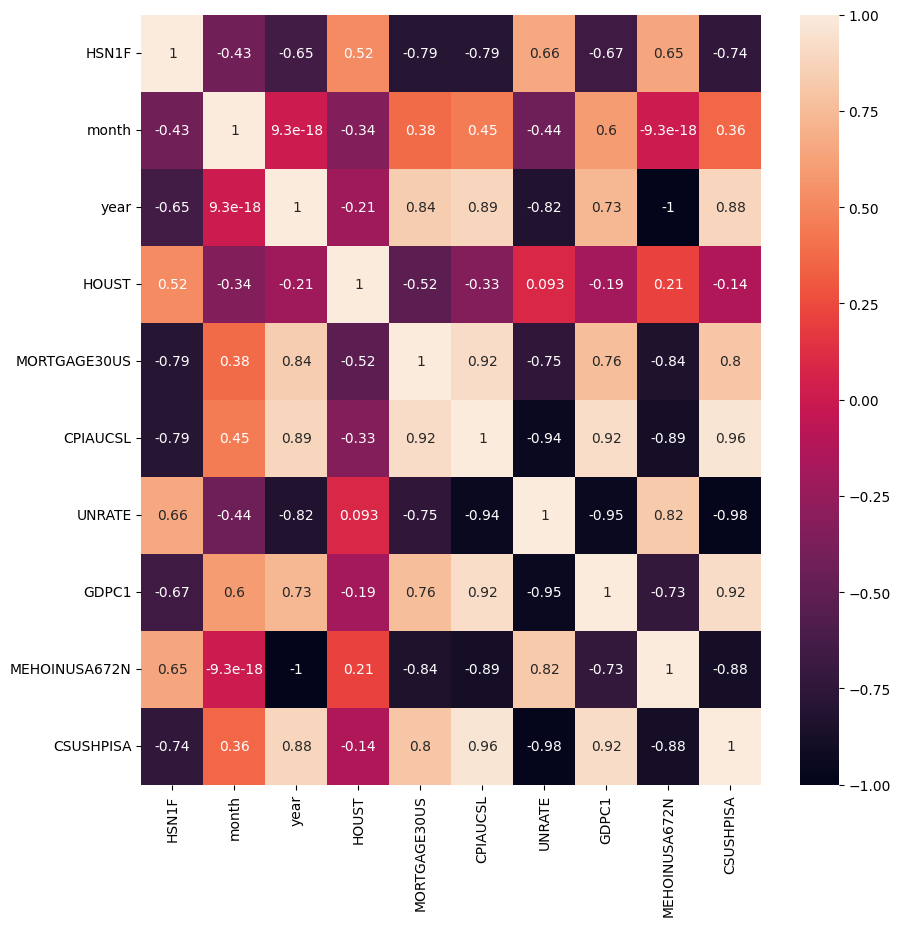

In [ ]:
#heatmap for correlation
plt.figure(figsize=(10,10))
sns.heatmap(data_scaled.corr(),annot=True)


In [ ]:
# correlation higher then threshold 0.90
correlation_matrix = data_scaled.corr()
filtered_correlation = correlation_matrix[abs(correlation_matrix) > 0.90]
filtered_correlation

,HSN1F,month,year,HOUST,MORTGAGE30US,CPIAUCSL,UNRATE,GDPC1,MEHOINUSA672N,CSUSHPISA
HSN1F,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN
HOUST,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
MORTGAGE30US,NaN,NaN,NaN,NaN,1.000000,0.919193,NaN,NaN,NaN,NaN
CPIAUCSL,NaN,NaN,NaN,NaN,0.919193,1.000000,-0.939180,0.922397,NaN,0.963986
UNRATE,NaN,NaN,NaN,NaN,NaN,-0.939180,1.000000,-0.946337,NaN,-0.980403
GDPC1,NaN,NaN,NaN,NaN,NaN,0.922397,-0.946337,1.000000,NaN,0.919656
MEHOINUSA672N,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CSUSHPISA,NaN,NaN,NaN,NaN,NaN,0.963986,-0.980403,0.919656,NaN,1.000000


In [ ]:
#VIF for feature selection by reducing correlated columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Remove highly correlated features (VIF > 10 is a common threshold)
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

         Feature         VIF
0          HSN1F    4.165615
1          month   42.034453
2           year         inf
3          HOUST    2.585497
4   MORTGAGE30US   26.955746
5       CPIAUCSL  235.108774
6         UNRATE   40.637573
7          GDPC1   21.870165
8  MEHOINUSA672N         inf


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


High value for year and MEHOINUSA672N dropping them

In [ ]:
data_scaled.drop(['MEHOINUSA672N','year'],axis=1,inplace=True)

In [ ]:
# Remove highly correlated features (VIF > 10 is a common threshold)
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

        Feature         VIF
0         HSN1F    3.677071
1         month    2.476977
2         HOUST    2.444856
3  MORTGAGE30US   25.122041
4      CPIAUCSL  114.851982
5        UNRATE   40.651501
6         GDPC1   19.344453


High value for CPIAUCSL dropping it

In [ ]:
data_scaled.drop(['CPIAUCSL'],axis=1,inplace=True)

In [ ]:
# Remove highly correlated features (VIF > 10 is a common threshold)
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

        Feature        VIF
0         HSN1F   3.172703
1         month   2.363819
2         HOUST   2.405792
3  MORTGAGE30US   5.220947
4        UNRATE  14.957903
5         GDPC1  17.400904


High value for GDPC1 dropping it

In [ ]:
data_scaled.drop(['GDPC1'],axis=1,inplace=True)

In [ ]:
# Remove highly correlated features (VIF > 10 is a common threshold)
vif_df = calculate_vif(data_scaled.drop(columns=['CSUSHPISA']))  # Exclude target variable
print(vif_df)

        Feature       VIF
0         HSN1F  3.145988
1         month  1.456534
2         HOUST  2.404950
3  MORTGAGE30US  5.024487
4        UNRATE  4.039573


All vif < 5

In [ ]:
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

        Feature  Importance
4        UNRATE    0.508719
3  MORTGAGE30US    0.384788
1         month    0.073990
0         HSN1F    0.026262
2         HOUST    0.006242


In [ ]:
data_scaled.drop(['HOUST','HSN1F'],axis=1,inplace=True)

In [ ]:
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

        Feature  Importance
2        UNRATE    0.572152
1  MORTGAGE30US    0.343804
0         month    0.084043


In [ ]:
X = data_scaled.drop(columns=['CSUSHPISA'])
y = data_scaled['CSUSHPISA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9855911857147421


In [ ]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")

Test RMSE: 0.13098083971167435


In [ ]:
train_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

print(f'Train R2: {train_r2}, Test R2: {test_r2}')

Train R2: 0.9966913893144858, Test R2: 0.9855911857147421


📊 Summary & Key Insights: U.S. Home Price Trends & Economic Indicators (1963-2024)

The dataset includes 744 records spanning January 1963 to 2024, covering crucial macroeconomic indicators and real estate trends.


1️⃣ Long-Term Economic & Housing Market Trends

📈 Real GDP (GDPC1)
Steady increase over time → Suggests economic growth, leading to rising wages, job opportunities, and higher consumer spending.

GDP & Home Prices Correlation: 0.94 → Economic expansion supports home price appreciation.

🏡 Home Prices & Income (CSUSHPISA & MEHOINUSA672N)

Home Prices have quintupled since the 1960s (Mean: 147.37, Max: 326).

Median Household Income has increased but lags behind home prices (Mean: $68,362, Max: $81,210).

Correlation: 0.89 → Higher incomes support home price growth, but inflation impacts affordability.

📊 Inflation (CPIAUCSL) & Mortgage Rates (MORTGAGE30US)

CPI has tripled since the 1960s, causing rising home prices & cost of living.

Mortgage Rates peaked at 18.45% in the 1980s, dropping to 2.68% during COVID-19, and rising again post-2020.

Mortgage Rates & Home Prices Correlation: -0.69 → Higher mortgage rates slow home price growth.

2️⃣ Post-2020 COVID-19 Shift (2020-2023 Data)

Higher Mortgage Rates (MORTGAGE30US) (~5-7%) → Reduces affordability & demand.

Income Growth (MEHOINUSA672N) Increased but Inflation Remains a Factor → While incomes rose, inflation reduced purchasing power.

Feature Importance (2020-2023 Data)

Unemployment Rate (UNRATE): 57.2% → Most influential factor in recent years.

Mortgage Rates (MORTGAGE30US): 34.3% → Rising rates limit affordability.

Month Seasonality: 8.4% → Suggests seasonal trends in housing demand.

3️⃣ Key Observations on Model Performance

✅ Correlation Analysis

Strongest Predictors of Home Prices:

CPI (0.94), GDP (0.94), Median Income (0.89) → Directly influence home prices.

Mortgage Rates (-0.69), Unemployment (-0.60) → Indicate affordability & demand.

📉 Residual Analysis & Model Issues

Residual distribution is skewed, indicating:

Non-linearity → Potential need for polynomial terms or advanced models (e.g., XGBoost, LSTMs).

Feature shifts post-2020 → Consider separate models for pre- and post-COVID data.

Autocorrelation in residuals → May need time-series methods.

4️⃣ Final Takeaways & Next Steps

🔹 Economic Expansion → Historically, Mortgage rate & household income drive home prices up.

🔹 Rising Mortgage Rates (Post-2020) → Reduces affordability & slows price growth.

🔹 Inflation & Wages Lag → Home prices are outpacing wage growth, impacting affordability.

🔹 Unemployment Becomes a Key Factor Post-COVID → Job market conditions heavily influence home prices.

